## U.S. Wildfire Exploratory Data Analysis (EDA) - Is Their a Greater Issue at Hand? ##

The objective of conducting EDA is to examine the relationships between variables in the data and to uncover additional relevant trends in the data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file = 'Federal Firefighting Costs (Suppression Only).csv'
data = pd.read_csv(file)
df = pd.DataFrame(data)
df.head()

,Year,Fires,Acres,ForestService,DOIAgencies,Total
0,1985,"82,591","2,896,147","$161,505,000","$78,438,000","$239,943,000"
1,1986,"85,907","2,719,162","$111,625,000","$91,153,000","$202,778,000"
2,1987,"71,300","2,447,296","$253,657,000","$81,452,000","$335,109,000"
3,1988,"72,750","5,009,290","$429,609,000","$149,317,000","$578,926,000"
4,1989,"48,949","1,827,310","$331,672,000","$168,115,000","$499,787,000"


## Cleanup ##

In [3]:
df['ForestService'] = df['ForestService'].str.strip('$')
df['DOIAgencies'] = df['DOIAgencies'].str.strip('$')
df['Total'] = df['Total'].str.strip('$')
df['Currency'] = 'USD'
df = df.rename(columns = {'Total':'Total Fire Suppression Cost', 'Acres':'Acres Burnt'})
df['Fires'] = df['Fires'].str.replace(",", "", regex=True)
df['Acres Burnt'] = df['Acres Burnt'].str.replace(",", "", regex=True)
df['Total Fire Suppression Cost'] = df['Total Fire Suppression Cost'].str.replace(",", "", regex=True)
df['Fires'] = df['Fires'].astype(int)
df['Acres Burnt'] = df['Acres Burnt'].astype(int)
df['Total Fire Suppression Cost'] = df['Total Fire Suppression Cost'].astype(int)

## Create Additional Fields for EDA ##

In [4]:
df['Acres Burnt per Fire'] = round(df['Acres Burnt']/df['Fires'], 2)
df['Suppression Cost per Fire'] = round(df['Total Fire Suppression Cost']/df['Fires'], 2)
df['Year over Year Change in Fire Supression Cost'] = df['Total Fire Suppression Cost'].diff(1)
df['Year over Year Change in Fire Supression Cost'].fillna(value='0', inplace=True)
df['Year over Year Change in Fire Supression Cost'] = df['Year over Year Change in Fire Supression Cost'].astype(int)
df.head()

,Year,Fires,Acres Burnt,ForestService,DOIAgencies,Total Fire Suppression Cost,Currency,Acres Burnt per Fire,Suppression Cost per Fire,Year over Year Change in Fire Supression Cost
0,1985,82591,2896147,"161,505,000","78,438,000",239943000,USD,35.07,2905.20,0
1,1986,85907,2719162,"111,625,000","91,153,000",202778000,USD,31.65,2360.44,-37165000
2,1987,71300,2447296,"253,657,000","81,452,000",335109000,USD,34.32,4699.99,132331000
3,1988,72750,5009290,"429,609,000","149,317,000",578926000,USD,68.86,7957.75,243817000
4,1989,48949,1827310,"331,672,000","168,115,000",499787000,USD,37.33,10210.36,-79139000


In [5]:
df.corr()

,Year,Fires,Acres Burnt,Total Fire Suppression Cost,Acres Burnt per Fire,Suppression Cost per Fire,Year over Year Change in Fire Supression Cost
Year,1.000000,-0.351906,0.642506,0.857381,0.741529,0.857956,0.029446
Fires,-0.351906,1.000000,0.035955,-0.273444,-0.280582,-0.478791,0.330569
Acres Burnt,0.642506,0.035955,1.000000,0.748912,0.938500,0.636655,0.497200
Total Fire Suppression Cost,0.857381,-0.273444,0.748912,1.000000,0.815059,0.962392,0.346860
Acres Burnt per Fire,0.741529,-0.280582,0.938500,0.815059,1.000000,0.787755,0.360026
Suppression Cost per Fire,0.857956,-0.478791,0.636655,0.962392,0.787755,1.000000,0.199318
Year over Year Change in Fire Supression Cost,0.029446,0.330569,0.497200,0.346860,0.360026,0.199318,1.000000


## Visualize Relationships Between Variables ##

Text(0.5, 1.0, 'Feature Correlation')

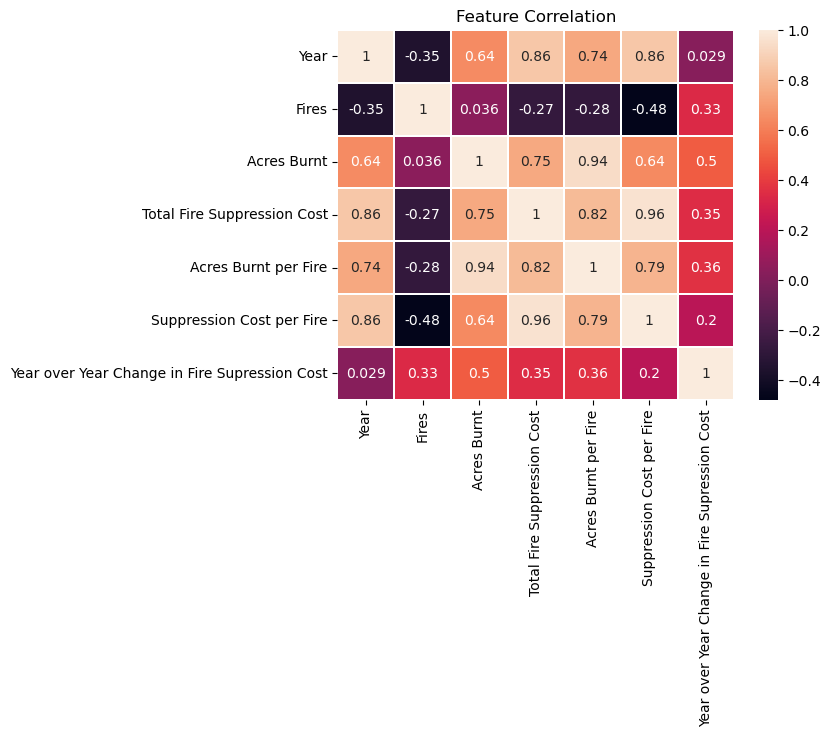

In [6]:
sns.heatmap(df.corr(), annot=True, linewidths=.05)
plt.title('Feature Correlation', fontsize=12)

**To no surpise, there is a relatively strong positive relationship between fields like "Suppression Cost per Fire" and "Acres Burnt" (correlation of 0.64) and there is a strong positive relationship between fields like "Total Fire Suppression Cost" and "Suppression Cost per Fire" (correlation of 0.96). Let's analyze these correlations and fields over time.**

## Understanding Overlying Trends in Data ##

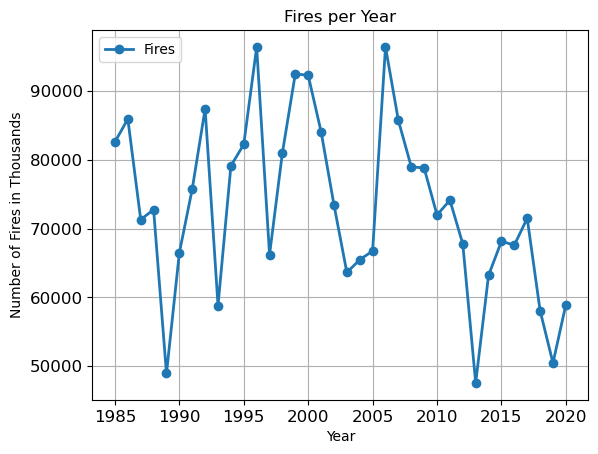

In [7]:
df = df.set_index(df['Year'])
df['Fires'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires in Thousands')
plt.grid()
plt.legend(fontsize=10, loc='upper left')

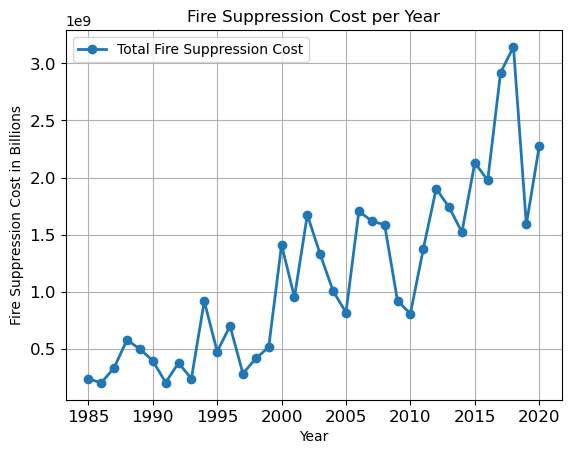

In [8]:
df['Total Fire Suppression Cost'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Fire Suppression Cost per Year')
plt.xlabel('Year')
plt.ylabel('Fire Suppression Cost in Billions')
plt.grid()
plt.legend(fontsize=10, loc='upper left')

**Takeaway: The two charts show that while the number of fires per year has declined, the cost of putting fires out has increased per year which is an interesting disposition. Does this infer that fires are more potent where they burn more acres? Or possibly they have grown more costly over time (i.e. think inflation, cost changes to services and goods)? Let's find out!**

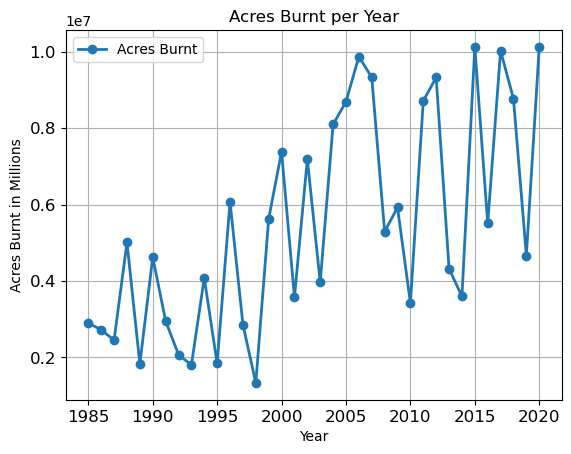

In [9]:
df['Acres Burnt'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Acres Burnt per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burnt in Millions')
plt.grid()
plt.legend(fontsize=10, loc='upper left')

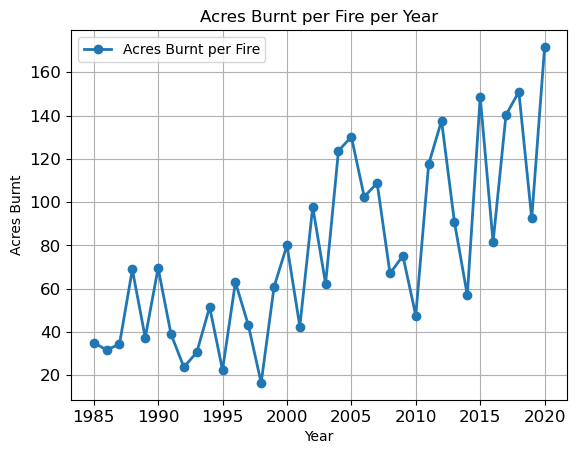

In [10]:
df['Acres Burnt per Fire'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Acres Burnt per Fire per Year')
plt.xlabel('Year')
plt.ylabel('Acres Burnt')
plt.grid()
plt.legend(fontsize=10, loc='upper left')

**Over time, not only have fires burnt more acres per year, they also burn more acres per fire. This is a key finding and it is crucial for the clents of this project to understand going forward. Further, we do not have the data to validate changes in cost over time but understanding that component of this also would be valuable for the clients. It is worth seeing if there is a trend in the year over year change in fire suppression cost. Perhaps that can provide some clarity on changes in cost over time?**

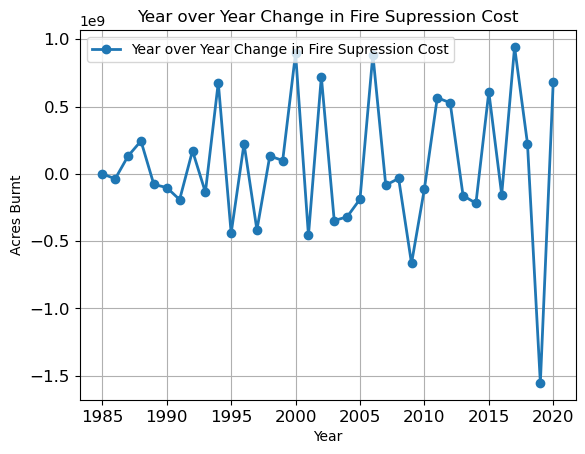

In [13]:
df['Year over Year Change in Fire Supression Cost'].plot(linewidth=2, fontsize=12, marker='o')
plt.title('Year over Year Change in Fire Supression Cost')
plt.xlabel('Year')
plt.ylabel('Acres Burnt')
plt.grid()
plt.legend(fontsize=10, loc='upper left')

**This graph does not provide clarity to changes in costs over time. While costs have fluctuated over time with greater troughs and peaks, cost activity has maintained relatively consistent except for 2019, which was a signifcant outlier.**